# Exploring Septima data layers

**Source:** https://septima.dk/rida-web/

**Access:** see slack 2023-06-15

**Data preparation:**

* make a folder `data/_septima` (will be gitignored)
* make one folder `data/_septima/<CATEGORY>` where `<CATEGORY>` is replaced by the Septima RIDA data categories as found on the website (e.g. "Vejtyper", "Landskaber og beskyttet natur", etc.)
* download all `.zip` files from https://septima.dk/rida-web/ into their correspoding subfolder

Or, better, to reproduce without downloading yourself:
* make a folder `data/_septima` (will be gitignored)
* paste the contents of [this Dropbox folder](https://www.dropbox.com/sh/48lcq0ahs9rkotq/AAAT3aPY45f-K3Z6GLpqrC16a?dl=0) there

**Goal of this notebook**

* Explore all categories and subcategories within the WFS layers; 
* create an overview of all data categories available (see sheets 1 and 2 of the [googlesheet here](https://docs.google.com/spreadsheets/d/19oPiRxOglcvQkEgUipIW7I29kDV0PbKkuJzRGNrAy38/edit?usp=sharing))
* final goal: decide which of the data layers we keep for our knudepunkter evaluation

**Workflow below**:

For each of the `.zip` files,
* import it
* explore its categories and subcategories, + geometry types, and note down in googlesheet


In [1]:
# import libraries
import os
os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd
from collections import Counter
import numpy as np

In [2]:
# set main file path
fp = "../data/_septima/"

**Vejtyper**

In [5]:
fpc = fp + "Vejtyper"
os.listdir(fpc)

['.DS_Store', 'vej_basislinje', 'vej_type']

Vej_basislinje

In [7]:
gdf = gpd.read_file(fpc + "/vej_basislinje/vej_basislinje.shp")

In [11]:
gdf.head(3)

,tmp_id,refid,kommunekod,type,kilde,opdateret,geometry
0,1,1221986843,0265,Vej,GeoDK,2023-02-13,"LINESTRING (689939.610 6168684.260, 689936.530..."
1,2,1221986844,0265,Vej,GeoDK,2023-02-13,"LINESTRING (689923.870 6168635.340, 689922.000..."
2,3,1221986845,0265,Vej,GeoDK,2023-02-13,"LINESTRING (689795.700 6168553.580, 689794.720..."


In [15]:
Counter(gdf["type"])

Counter({'Vej': 1743150, 'Sti': 611641})

In [13]:
all(gdf.geometry.type == "LineString")

True

In [16]:
del(gdf)

Vej_type

In [18]:
gdf = gpd.read_file(fpc + "/vej_type/vej_type.shp")

In [19]:
gdf.head(3)

,tmp_id,refid,gruppe,type,kilde,opdateret,geometry
0,1,1221986843,stier og mindre veje,Anden vej,GeoDK,2023-02-13,"LINESTRING (689939.610 6168684.260, 689936.530..."
1,2,1221986844,stier og mindre veje,Anden vej,GeoDK,2023-02-13,"LINESTRING (689923.870 6168635.340, 689922.000..."
2,3,1221986845,stier og mindre veje,Anden vej,GeoDK,2023-02-13,"LINESTRING (689795.700 6168553.580, 689794.720..."


In [22]:
Counter(gdf["gruppe"])

Counter({'stier og mindre veje': 2163993,
         'store veje': 185513,
         'motorveje': 5285})

In [24]:
Counter(gdf[gdf["gruppe"]=="stier og mindre veje"]["type"])

Counter({'Lille vej': 690366,
         'Adgangsvej': 314481,
         'Mindre sti': 296601,
         'Anden vej': 286535,
         'Mellem vej': 259845,
         'Hovedsti': 220169,
         'Cykelsti langs vej': 53357,
         'Cykelbane (markeret på vej)': 39639,
         'Gangsti': 1482,
         'Gågade': 592,
         'Fiktiv': 565,
         'Bussluse': 208,
         'Redningsvej': 153})

In [25]:
Counter(gdf[gdf["gruppe"]=="store veje"]["type"])

Counter({'Stor vej': 97454, 'Fordelingsrute': 69819, 'Gennemfartsrute': 18240})

In [26]:
Counter(gdf[gdf["gruppe"]=="motorveje"]["type"])

Counter({'Motorvej': 4157, 'Motortrafikvej': 1128})

In [20]:
all(gdf.geometry.type == "LineString")

True

In [27]:
Counter(gdf["type"])

Counter({'Lille vej': 690366,
         'Adgangsvej': 314481,
         'Mindre sti': 296601,
         'Anden vej': 286535,
         'Mellem vej': 259845,
         'Hovedsti': 220169,
         'Stor vej': 97454,
         'Fordelingsrute': 69819,
         'Cykelsti langs vej': 53357,
         'Cykelbane (markeret på vej)': 39639,
         'Gennemfartsrute': 18240,
         'Motorvej': 4157,
         'Gangsti': 1482,
         'Motortrafikvej': 1128,
         'Gågade': 592,
         'Fiktiv': 565,
         'Bussluse': 208,
         'Redningsvej': 153})

In [28]:
del(gdf)

**Vejmyndighed**

In [33]:
fpc = fp + "Vejmyndighed"
os.listdir(fpc)

['vej_myndighed']

In [34]:
gdf = gpd.read_file(fpc + "/vej_myndighed/vej_myndighed.shp")

In [35]:
gdf.head(3)

,tmp_id,refid,bestyrer_n,bestyrer,type,kilde,importeret,geometry
0,1,1,787.0,Thisted,Privat fællesvej,CVF,2023-02-16,"LINESTRING (457463.480 6292962.001, 457473.050..."
1,2,2,787.0,Thisted,Off. kommunevej,CVF,2023-02-16,"LINESTRING (464055.990 6285303.131, 464061.180..."
2,3,3,787.0,Thisted,Off. kommunevej,CVF,2023-02-16,"LINESTRING (465041.470 6289644.081, 465067.510..."


In [36]:
Counter(gdf["bestyrer"])

Counter({'Aarhus': 19219,
         'Aalborg': 12275,
         'Esbjerg': 7481,
         'Herning': 7391,
         'Silkeborg': 6804,
         'Odense': 6783,
         'Vejle': 6749,
         'Viborg': 6215,
         'Sønderborg': 5852,
         'Aabenraa': 5364,
         'Odsherred': 4980,
         'Slagelse': 4959,
         'Kolding': 4919,
         'Horsens': 4802,
         'Skanderborg': 4799,
         'Ringkøbing-Skjern': 4777,
         'Vordingborg': 4700,
         'Faaborg-Midtfyn': 4534,
         'Randers': 4294,
         'Næstved': 4265,
         'Favrskov': 4235,
         'Fredericia': 4199,
         'Hjørring': 4093,
         'Gribskov': 4016,
         'Svendborg': 3796,
         'København': 3739,
         'Frederikshavn': 3736,
         'Guldborgsund': 3656,
         'Holstebro': 3612,
         'Bornholm': 3608,
         'Hedensted': 3537,
         'Holbæk': 3455,
         'Køge': 3360,
         'Frederikssund': 3339,
         'Vejdirektoratet': 3304,
         'Haderslev': 

In [37]:
Counter(gdf["type"])

Counter({'Off. kommunevej': 146602,
         'Privat fællesvej': 121691,
         'Privat vej': 18713,
         'Off. statsvej': 3304,
         'Almen vej': 1176,
         'Udlagt priv. fælles': 623})

In [38]:
Counter(gdf[gdf["bestyrer"]=="Randers"]["type"])

Counter({'Off. kommunevej': 2006,
         'Privat fællesvej': 1958,
         'Udlagt priv. fælles': 209,
         'Privat vej': 121})

In [39]:
all(gdf.geometry.type == "LineString")

False

In [46]:
all([t.geom_type in ["LineString", "MultiLineString"] for t in gdf.geometry])

True

In [47]:
del(gdf)

**Hastighedsgrænser**

In [32]:
fpc = fp + "Hastighedsgraenser"
os.listdir(fpc)

['vej_hastighedsgraense']

In [33]:
gdf = gpd.read_file(fpc + "/vej_hastighedsgraense/vej_hastighedsgraense.shp")

In [34]:
gdf.head(3)

,tmp_id,id,gruppe,type,paabudt_ma,anbefalet_,kilde,geometry
0,1,34397608,høj,80.0,80.0,NaN,OSM,"LINESTRING (672526.237 6139473.053, 672517.488..."
1,2,194413279,høj,80.0,80.0,NaN,OSM,"LINESTRING (505249.967 6080805.894, 505458.048..."
2,3,25346926,høj,100.0,100.0,NaN,OSM,"LINESTRING (504907.758 6079898.813, 505000.182..."


In [51]:
Counter(gdf["type"])

Counter({50.0: 57275,
         80.0: 25229,
         60.0: 10376,
         40.0: 8739,
         30.0: 7591,
         70.0: 6221,
         20.0: 1497,
         90.0: 753,
         100.0: 155,
         10.0: 58,
         110.0: 5})

<Axes: >

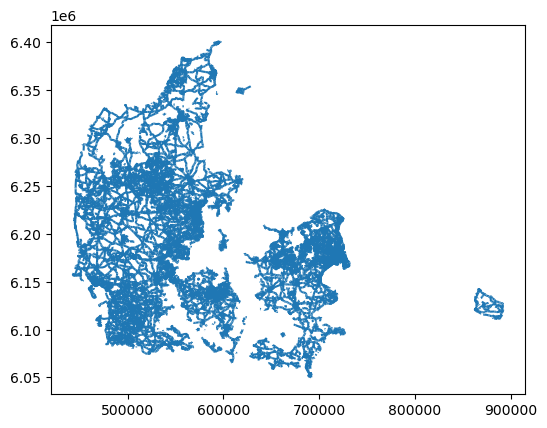

In [35]:
gdf.plot()

In [52]:
all(gdf.geometry.geom_type == "LineString")

True

In [54]:
del(gdf)

**Landskaber og beskyttet natur**

In [53]:
fpc = fp + "Landskaber og beskyttet natur"
os.listdir(fpc)

['land_frednatpark',
 'land_beskyttnatur_linje',
 'land_vaerdifuld',
 'land_beskyttnatur_flade']

land_frednatpark

In [55]:
gdf = gpd.read_file(fpc + "/land_frednatpark/land_frednatpark.shp")

In [56]:
gdf.head(3)

,tmp_id,refid,type,kilde,importeret,geometry
0,1,1,Fredet område,DMP,2023-02-16,"POLYGON ((481354.158 6127069.914, 481355.889 6..."
1,2,2,Fredet område,DMP,2023-02-16,"POLYGON ((481185.671 6126399.489, 481227.552 6..."
2,3,3,Fredet område,DMP,2023-02-16,"POLYGON ((491755.689 6127514.472, 492002.092 6..."


In [57]:
Counter(gdf["type"])

Counter({'Fredet område': 4180,
         'Bekendtgørelsesfredning': 34,
         'Naturnationalpark': 15,
         'Naturpark': 11,
         'Nationalpark': 10})

In [60]:
all([t in ["Polygon", "MultiPolygon"] for t in gdf.geometry.geom_type])

True

In [61]:
del(gdf)

land_beskyttnatur_linje

In [62]:
gdf = gpd.read_file(fpc + "/land_beskyttnatur_linje/land_beskyttnatur_linje.shp")

In [63]:
gdf.head(3)

,tmp_id,refid,type,kilde,importeret,geometry
0,1,1,Beskyttet vandløb,DMP,2023-02-16,"LINESTRING (886437.403 6110844.186, 886438.337..."
1,2,2,Beskyttet vandløb,DMP,2023-02-16,"LINESTRING (862929.060 6132674.255, 862929.068..."
2,3,3,Beskyttet vandløb,DMP,2023-02-16,"LINESTRING (886063.224 6110876.588, 886054.182..."


In [64]:
Counter(gdf["type"])

Counter({'Beskyttet vandløb': 98081})

In [65]:
Counter(gdf["geometry"].geom_type)

Counter({'LineString': 98074, 'MultiLineString': 7})

In [66]:
del(gdf)

land_vaerdifuld

In [67]:
gdf = gpd.read_file(fpc + "/land_vaerdifuld/land_vaerdifuld.shp")

In [68]:
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Polygon': 71637, 'MultiPolygon': 2572})


,tmp_id,type,refid,cvrname,komnr,link,kilde,importeret,geometry
0,1,Bevaringsværdig landskab,3105200,Aalborg kommune,851,https://dokument.plandata.dk/11_1106459_DRAFT_...,Plan,2023-02-16,"POLYGON ((530601.554 6320941.391, 530582.554 6..."
1,2,Bevaringsværdig landskab,10851484,Lolland kommune,360,https://dokument.plandata.dk/11_10817377_16494...,Plan,2023-02-16,"POLYGON ((629609.739 6084979.240, 629643.770 6..."
2,3,Bevaringsværdig landskab,10353486,Næstved kommune,370,https://dokument.plandata.dk/11_10265731_16251...,Plan,2023-02-16,"POLYGON ((682280.790 6119136.110, 682259.260 6..."


In [69]:
Counter(gdf["type"])

Counter({'Naturbeskyttelsesområde': 43064,
         'Kulturhistorisk bevaringsværdi': 24458,
         'Værdifuldt kulturmiljø': 4001,
         'Bevaringsværdig landskab': 2686})

In [70]:
del(gdf)

land_beskyttnatur_flade

In [71]:
gdf = gpd.read_file(fpc + "/land_beskyttnatur_flade/land_beskyttnatur_flade.shp")

In [72]:
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Polygon': 305236, 'MultiPolygon': 2862})


,tmp_id,refid,type,kilde,importeret,geometry
0,1,1,Beskyttet natur,DMP,2023-02-16,"POLYGON ((721704.978 6168909.923, 721676.760 6..."
1,2,2,Beskyttet natur,DMP,2023-02-16,"POLYGON ((536244.207 6341674.826, 536213.080 6..."
2,3,3,Beskyttet natur,DMP,2023-02-16,"POLYGON ((721631.407 6183878.419, 721633.700 6..."


In [73]:
Counter(gdf["type"])

Counter({'Beskyttet natur': 308098})

In [74]:
del(gdf)

**Arealanvendelse**

In [75]:
fpc = fp + "Arealanvendelse"
os.listdir(fpc)

['land_anvendelse']

In [76]:
gdf = gpd.read_file(fpc + "/land_anvendelse/land_anvendelse.shp")

In [77]:
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Polygon': 1184461, 'MultiPolygon': 21754})


,tmp_id,gruppe,type,kilde,geometry
0,1,Teknisk areal,Militært anlæg,GeoDK,"POLYGON ((716290.390 6129802.910, 716263.130 6..."
1,2,Teknisk areal,Militært anlæg,GeoDK,"POLYGON ((717442.600 6189461.770, 717435.320 6..."
2,3,Teknisk areal,Militært anlæg,GeoDK,"POLYGON ((706058.820 6169023.820, 706067.290 6..."


In [79]:
for gr in np.unique(gdf["gruppe"]):
    print(gr)
    print(Counter(gdf[gdf["gruppe"]==gr]["type"]))

Bymæssig anvendelse
Counter({'Lav bebyggelse': 176860, 'Erhverv': 6135, 'Høj bebyggelse': 1764, 'Sommerhusområde': 1436, 'Sommerhusområde skov': 982, 'Bykerne': 204})
Dyrkede arealer
Counter({'Dyrkede afgrøder på marker': 330871, 'Afgræssede marker': 211944, 'Braklagte marker': 33466})
Naturtyper
Counter({'Sø': 181995, 'Skov': 101395, 'Kratbevoksning': 42614, 'Vådområde': 25334, 'Hede': 7717, 'Gartneri': 2160, 'Sandklit': 794, 'Råstofområde': 565})
Skovinddeling
Counter({'Blandet': 58173, 'Nåletræ': 7743, 'Løvtræ': 4856})
Teknisk areal
Counter({'Sportsanlæg': 4426, 'Andre': 3535, 'Energiforsyningsanlæg': 1107, 'Militært anlæg': 81, 'Lufthavn': 52, 'Affaldsanlæg': 6})


In [80]:
del(gdf)

**Ejerskab**

In [81]:
fpc = fp + "Ejerskab"
os.listdir(fpc)

['land_ejerskab']

In [82]:
gdf = gpd.read_file(fpc + "/land_ejerskab/land_ejerskab.shp")

In [83]:
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Polygon': 2902943, 'MultiPolygon': 126821})


,tmp_id,gruppe,type,kilde,importeret,geometry
0,1,Ejerforhold,Andre,RIDA,NaN,"POLYGON ((561450.343 6246319.661, 561440.716 6..."
1,2,Ejerforhold,Andre,RIDA,NaN,"MULTIPOLYGON (((570535.407 6247311.929, 570519..."
2,3,Ejerforhold,Andre,RIDA,NaN,"MULTIPOLYGON (((570352.000 6246201.005, 570362..."


In [84]:
Counter(gdf["gruppe"])

Counter({'Ejerforhold': 3028734, 'Statslige styrelser': 1030})

In [85]:
Counter(gdf["gruppe"])

Counter({'Ejerforhold': 3028734, 'Statslige styrelser': 1030})

In [87]:
del(gdf)

**Faciliteter**

In [4]:
fpc = fp + "Faciliteter"
os.listdir(fpc)

['facilit_overnatning',
 'facilit_indkoeb',
 'facilit_service',
 'facilit_rasteplads']

facilit_overnatning

In [89]:
fn = "facilit_overnatning"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Point': 2467})


,tmp_id,refid,type,navn,kilde,importeret,geometry
0,1,801343,Hotel,Rønne Hotel,GuideDanmark,2023-02-16,POINT (863477.000 6120880.140)
1,2,955161,Hotel,Skjoldenæsholm Hotel & Konferencecenter,GuideDanmark,2023-02-16,POINT (680036.230 6158075.800)
2,3,619418,Vandrehjem,Danhostel Roskilde,GuideDanmark,2023-02-16,POINT (693634.460 6171401.650)


In [91]:
Counter(gdf["type"])

Counter({'Bed & Breakfast': 816,
         'Hotel': 712,
         'Campingplads': 438,
         'Slot/Herregård': 214,
         'Vandrehjem': 139,
         'Feriecenter': 78,
         'Kro': 70})

In [92]:
del(gdf)

facilit_indkoeb

In [93]:
fn = "facilit_indkoeb"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Point': 8690})


,tmp_id,refid,type,cvrnr,pnr,navn,kilde,imported,geometry
0,1,923224,kiosk,40187804.0,1.024329e+09,Købmand Nk 11,FVST smiley,2023-02-17,POINT (720336.170 6172844.470)
1,2,975355,kiosk,41447435.0,1.026245e+09,Pizzakiosken,FVST smiley,2023-02-17,POINT (559572.430 6369812.700)
2,3,909223,kiosk,39116227.0,1.023068e+09,Strøg Kiosk,FVST smiley,2023-02-17,POINT (718975.342 6171433.187)


In [94]:
Counter(gdf["type"])

Counter({'supermarked': 2933,
         'bager': 1572,
         'kiosk': 1448,
         'slagter': 1209,
         'Lokale smagsoplevelser': 591,
         'tankstation': 513,
         'fisk': 423,
         'Virkelig guf': 1})

In [95]:
del(gdf)

facilit_service

In [5]:
fn = "facilit_service"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'MultiPoint': 6343})


,tmp_id,refid,gruppe,type,type_kode,navn,kilde,importeret,geometry
0,1,ce01d63b-12b8-4ead-bb37-b834c7f50210,Standard,Vandpost,1222.0,Vandpost ved toilet Lynggårdsskoven,GeoFA,2023-02-21,MULTIPOINT (882931.376 6115083.745)
1,2,b36f2e6c-e244-4c4e-9984-e4af7cc01786,Standard,Vandpost,1222.0,Vandpost ved toiletter Chr. Høj,GeoFA,2023-02-21,MULTIPOINT (876412.893 6124305.078)
2,3,79f35201-c7ff-4991-9a0f-07fb2ff262b4,Standard,Vandpost,1222.0,Vandpost ved toilet i Blykobbe Plantage,GeoFA,2023-02-21,MULTIPOINT (863365.883 6122949.217)


In [6]:
Counter(gdf["type"])

Counter({'Toilet': 4008,
         'Drikkevand': 811,
         'Cykelhandler': 704,
         'Vandpost': 371,
         'Cykeludlejere': 185,
         'Cykelservice': 112,
         'Cykelpumpestation/-servicepost': 104,
         'Turistkontor': 48})

In [97]:
Counter(gdf["gruppe"])

Counter({'Supplement': 3964, 'Standard': 2379})

In [98]:
Counter(gdf[gdf["gruppe"]=="Supplement"]["type"])

Counter({'Toilet': 2337,
         'Drikkevand': 811,
         'Cykelhandler': 704,
         'Cykelservice': 112})

In [99]:
Counter(gdf[gdf["gruppe"]=="Standard"]["type"])

Counter({'Toilet': 1671,
         'Vandpost': 371,
         'Cykeludlejere': 185,
         'Cykelpumpestation/-servicepost': 104,
         'Turistkontor': 48})

In [100]:
Counter(gdf[gdf["type"]=="Toilet"]["gruppe"])

Counter({'Supplement': 2337, 'Standard': 1671})

In [7]:
del(gdf)

facilit_rasteplads

In [8]:
fn = "facilit_rasteplads"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'MultiPoint': 25391})


,tmp_id,refid,gruppe,type,type_kode,navn,kilde,importeret,geometry
0,1,355547cf-2989-4efb-8bb1-94b009bd29a7,Standard,Tørvejrsrum/Madpakkehus,1132.0,"Sønderskoven, Als v. Kryb i ly",GeoFA,2023-02-21,MULTIPOINT (553545.000 6084272.000)
1,2,12087f71-4b89-439c-99c8-5aac312088f3,Standard,Tørvejrsrum/Madpakkehus,1132.0,"Sønderskoven, Als v. Egetofte",GeoFA,2023-02-21,MULTIPOINT (553947.000 6084113.000)
2,3,b6a60a2e-0d26-46cf-9c50-a2296bb6f155,Standard,Legeplads,1031.0,Legeplads i Agerbæk,GeoFA,2023-02-21,MULTIPOINT (487172.856 6161448.125)


In [10]:
Counter(gdf["type"])

Counter({'Bænk': 14692,
         'Picnicbord': 6544,
         'Legeplads': 2224,
         'Borde-bænke/Picnic': 1235,
         'Tørvejrsrum/Madpakkehus': 536,
         'Naturlegeplads': 156,
         'Vandlegeplads': 4})

In [9]:
Counter(gdf["gruppe"])

Counter({'Supplement': 22871, 'Standard': 2520})

**Attraktioner**

In [11]:
fpc = fp + "Attraktioner"
os.listdir(fpc)

['land_besoegs', 'land_landemaerke', 'land_fortid', 'land_udflugt']

land_besoegs

In [12]:
fn = "land_besoegs"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Point': 2015})


,tmp_id,refid,gruppe,type,type_kode,navn,kilde,importeret,geometry
0,1,614583,Standard,Museum,NaN,Landbrugsmuseet Melstedgaard,GuideDanmark,2023-02-16,POINT (880310.340 6133651.240)
1,2,614927,Standard,Museum,NaN,Oluf Høst Museet,GuideDanmark,2023-02-16,POINT (879402.740 6134822.770)
2,3,1080523,Standard,Museum,NaN,Danmarks Busmuseum,GuideDanmark,2023-02-16,POINT (647220.480 6125345.020)


In [13]:
Counter(gdf["gruppe"])

Counter({'Standard': 1069, 'Supplement': 946})

In [14]:
Counter(gdf["type"])

Counter({'Museum': 895,
         'Anden seværdighed': 818,
         'Forlystelsespark': 127,
         'Dyrepark': 67,
         'Aboret, blomsterpark o.l.': 49,
         'Dyrepark, zoo': 38,
         'Frilandsmuseum': 21})

land_landemaerke

In [15]:
fn = "land_landemaerke"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'Point': 3470})


,tmp_id,refid,type,navn,kilde,importeret,geometry
0,1,5024,Kirke,Kildevældskirken,Sogn,2023-02-16,POINT (724064.919 6179980.157)
1,2,5061,Kirke,Flintholm Kirke,Sogn,2023-02-16,POINT (719980.489 6175904.551)
2,3,5071,Kirke,Sankt Markus Kirke,Sogn,2023-02-16,POINT (723345.987 6176165.127)


In [16]:
Counter(gdf["type"])

Counter({'Kirke': 2420,
         'Herregård': 695,
         'Vejrmølle': 255,
         'Fyrtårn': 72,
         'Slot': 28})

In [17]:
del(gdf)

land_fortid

In [18]:
fn = "land_fortid"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'MultiPoint': 5414})


,tmp_id,refid,gruppe,type,navn,kilde,importeret,geometry
0,1,1120283,supplement,Fortidsminde/ruin,Borum Eshøj - kopi,GuideDanmark,2023-02-16,MULTIPOINT (561758.168 6228993.713)
1,2,953026,supplement,Fortidsminde/ruin,Marslev | Vikingefund,GuideDanmark,2023-02-16,MULTIPOINT (592592.858 6143367.286)
2,3,1106338,supplement,Fortidsminde/ruin,Østerholm Slotsruin,GuideDanmark,2023-02-16,MULTIPOINT (559635.420 6095845.710)


In [19]:
Counter(gdf["type"])

Counter({'Gravhøj': 3875,
         'Vold eller voldsted': 587,
         'Fortidsminde/ruin': 369,
         'Dysse': 177,
         'Jættestue': 101,
         'Ruin': 82,
         'Skanse': 75,
         'Langdysse': 57,
         'Andet historisk anlæg': 49,
         'Batteri': 18,
         'Fæstningsanlæg': 7,
         'Runddysse': 7,
         'Vikingeborg': 5,
         'Oldtidsvej': 3,
         'Oldtidsminde': 2})

In [20]:
del(gdf)

land_udflugt

In [21]:
fn = "land_udflugt"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'MultiPoint': 3883})


,tmp_id,refid,gruppe,type,type_kode,navn,kilde,importeret,geometry
0,1,bdd0be3a-b0a7-4c8e-b568-45a16f02b357,Standard,Blå Flag strand,1061.0,Kerteminde Nordstrand,GeoFA,2023-02-21,MULTIPOINT (605274.840 6146822.739)
1,2,4e431428-d591-4f12-a6f9-edb314eeba49,Standard,Blå Flag strand,1061.0,Kerteminde Sydstrand,GeoFA,2023-02-21,MULTIPOINT (605413.260 6146046.655)
2,3,1d392d5b-033e-4aad-b81e-01922eb19e85,Standard,Udsigtspunkt,2022.0,Udsigten mod Rubjerg Knude,GeoFA,2023-02-21,MULTIPOINT (549225.581 6368875.990)


In [22]:
Counter(gdf["type"])

Counter({'Naturområde': 1518,
         'Udsigtspunkt': 1470,
         'Badestrand/-sted': 423,
         'Fugletårn/Udsigtstårn': 322,
         'Blå Flag strand': 111,
         'Badepunkt': 38,
         'Badevandsflag': 1})

**Skiltede ruter**

In [23]:
fpc = fp + "Skiltede Ruter"
os.listdir(fpc)

['rute_vandre', 'rute_anden', 'rute_cykel']

rute_vandre 

In [24]:
fn = "rute_vandre"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'LineString': 3508, 'MultiLineString': 1092})


,tmp_id,refid,type,type_kode,navn,bemaerknin,kilde,importeret,geometry
0,1,32858c3b-741f-4454-aef6-dc0f95e383e9,Vandrerute,5.0,Odder Vest,NaN,GeoFA,2023-02-21,"LINESTRING (569506.297 6205312.574, 569506.386..."
1,2,d30acca7-dc97-49da-9043-f2d759b3ee4b,Vandrerute,5.0,Stampmølledalen,NaN,GeoFA,2023-02-21,"LINESTRING (571105.670 6204827.142, 571092.392..."
2,3,247c4556-ae55-11eb-9106-06d09fa510f4,Vandrerute,5.0,Rundtur i Himmelev Skov,NaN,GeoFA,2023-02-21,"LINESTRING (695817.000 6173414.000, 695831.000..."


In [25]:
Counter(gdf["type"])

Counter({'Vandrerute': 4600})

In [26]:
del(gdf)

rute_anden

In [27]:
fn = "rute_anden"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'MultiLineString': 1})


,tmp_id,refid,type,type_kode,navn,bemaerknin,kilde,importeret,geometry
0,1,c9eae256-eefe-4e1d-9116-0f6457543dd2,Bilrute,13,Margueritruten,NaN,GeoFA,2023-02-21,"MULTILINESTRING ((537574.000 6345160.000, 5375..."


rute_cykel

In [28]:
fn = "rute_cykel"
gdf = gpd.read_file(fpc + f"/{fn}/{fn}.shp")
print(Counter(gdf.geometry.geom_type))
gdf.head(3)

Counter({'LineString': 560, 'MultiLineString': 474})


,tmp_id,refid,type,type_kode,navn,bemaerknin,kilde,importeret,geometry
0,1,13fb736c-ae57-11eb-84e3-06d09fa510f4,Cykelrute,3.0,Romantik på cykel,NaN,GeoFA,2023-02-21,"LINESTRING (693599.000 6171448.000, 693596.000..."
1,2,135f9622-ae57-11eb-84e1-06d09fa510f4,Cykelrute,3.0,Jyllingesløjfen,NaN,GeoFA,2023-02-21,"LINESTRING (694516.000 6182181.000, 694497.000..."
2,3,35213b30-ae57-11eb-84f3-06d09fa510f4,Cykelrute,3.0,Gl.Lejre - Greve,NaN,GeoFA,2023-02-21,"LINESTRING (686951.000 6167246.000, 686978.000..."


In [31]:
Counter(gdf["navn"])

Counter({nan: 75,
         'Panoramarute': 14,
         'Limfjordsruten - Cykelrute 12': 8,
         'Fjordstien': 8,
         'Vestkystruten': 6,
         'Limfjordsruten': 6,
         'Østeråstien': 6,
         'Hedebostien': 5,
         'Østkystruten': 5,
         'Tannisbugtruten': 5,
         'Rødhusruten': 4,
         'Munkevejen': 4,
         'Jyderupstien': 3,
         'Bollerruten': 3,
         'Bjergbanestien': 3,
         'Grøn Tur - Mellem Etapen': 3,
         'Tolneruten': 3,
         'Mølleådalen': 3,
         'Gl.Lejre - Greve': 2,
         'Vendsysselruten': 2,
         'Østkystruten - Cykelrute 5': 2,
         'Aalborg Fjordland': 2,
         'Aalborg Fjordland Huul Mølle ruten (101)': 2,
         'Naturstien': 2,
         'Fjordstien, rute 40': 2,
         'Reservatruten': 2,
         'Istidsruten': 2,
         'Regional cykelrute 30': 2,
         'Asdalruten': 2,
         'Hærvejen': 2,
         'Grænseruten': 2,
         'Banestien': 2,
         'Østersøruten': 2,
 